<a href="https://colab.research.google.com/github/juliakreutzer/joeynmt-utils/blob/master/JoeyNMT_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#JoeyNMT Embeddings
### Example code for getting the mapping from vocabulary tokens to embeddings for a JoeyNMT model

First we install JoeyNMT and train a toy model. The toy model serves the technical demonstration purpose and is not very useful for analysis. Please replace it with your own trained model.

In [1]:
!pip install joeynmt

In [9]:
!git clone https://github.com/joeynmt/joeynmt.git

Cloning into 'joeynmt'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 2479 (delta 2), reused 0 (delta 0), pack-reused 2467
Receiving objects: 100% (2479/2479), 2.65 MiB | 2.16 MiB/s, done.
Resolving deltas: 100% (1727/1727), done.


In [13]:
! cd joeynmt; python -m joeynmt train configs/small.yaml

2020-07-30 02:50:39,435 Hello! This is Joey-NMT.
2020-07-30 02:50:39.581776: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2020-07-30 02:50:41,029 Total params: 66376
2020-07-30 02:50:41,030 Trainable parameters: ['decoder.att_vector_layer.bias', 'decoder.att_vector_layer.weight', 'decoder.attention.energy_layer.weight', 'decoder.attention.key_layer.weight', 'decoder.attention.query_layer.weight', 'decoder.output_layer.weight', 'decoder.rnn.bias_hh_l0', 'decoder.rnn.bias_hh_l1', 'decoder.rnn.bias_ih_l0', 'decoder.rnn.bias_ih_l1', 'decoder.rnn.weight_hh_l0', 'decoder.rnn.weight_hh_l1', 'decoder.rnn.weight_ih_l0', 'decoder.rnn.weight_ih_l1', 'encoder.rnn.bias_hh_l0', 'encoder.rnn.bias_hh_l0_reverse', 'encoder.rnn.bias_hh_l1', 'encoder.rnn.bias_hh_l1_reverse', 'encoder.rnn.bias_hh_l2', 'encoder.rnn.bias_hh_l2_reverse', 'encoder.rnn.bias_ih_l0', 'encoder.rnn.bias_ih_l0_reverse', 'encoder.rnn.bias_ih_l1', 'encoder.rnn.b

All we need is stored in the model directory: checkpoints, vocabulary and the log which helps us find the variable name.

In [37]:
model_dir = 'joeynmt/models/small_model/'
! ls $model_dir

00000080.hyps.dev   70.hyps	  att.30.0.pdf	att.60.1.pdf  att.90.2.pdf
00000080.hyps.test  80.ckpt	  att.30.1.pdf	att.60.2.pdf  best.ckpt
10.hyps		    80.hyps	  att.30.2.pdf	att.70.0.pdf  config.yaml
20.hyps		    90.hyps	  att.40.0.pdf	att.70.1.pdf  src_vocab.txt
30.ckpt		    att.10.0.pdf  att.40.1.pdf	att.70.2.pdf  tensorboard
30.hyps		    att.10.1.pdf  att.40.2.pdf	att.80.0.pdf  train.log
40.hyps		    att.10.2.pdf  att.50.0.pdf	att.80.1.pdf  trg_vocab.txt
50.hyps		    att.20.0.pdf  att.50.1.pdf	att.80.2.pdf  validations.txt
60.ckpt		    att.20.1.pdf  att.50.2.pdf	att.90.0.pdf
60.hyps		    att.20.2.pdf  att.60.0.pdf	att.90.1.pdf


In the log we find the variable names in the "Trainable parameters" list.

In [15]:
! head $model_dir/train.log

2020-07-30 02:50:39,435 Hello! This is Joey-NMT.
2020-07-30 02:50:41,029 Total params: 66376
2020-07-30 02:50:41,030 Trainable parameters: ['decoder.att_vector_layer.bias', 'decoder.att_vector_layer.weight', 'decoder.attention.energy_layer.weight', 'decoder.attention.key_layer.weight', 'decoder.attention.query_layer.weight', 'decoder.output_layer.weight', 'decoder.rnn.bias_hh_l0', 'decoder.rnn.bias_hh_l1', 'decoder.rnn.bias_ih_l0', 'decoder.rnn.bias_ih_l1', 'decoder.rnn.weight_hh_l0', 'decoder.rnn.weight_hh_l1', 'decoder.rnn.weight_ih_l0', 'decoder.rnn.weight_ih_l1', 'encoder.rnn.bias_hh_l0', 'encoder.rnn.bias_hh_l0_reverse', 'encoder.rnn.bias_hh_l1', 'encoder.rnn.bias_hh_l1_reverse', 'encoder.rnn.bias_hh_l2', 'encoder.rnn.bias_hh_l2_reverse', 'encoder.rnn.bias_ih_l0', 'encoder.rnn.bias_ih_l0_reverse', 'encoder.rnn.bias_ih_l1', 'encoder.rnn.bias_ih_l1_reverse', 'encoder.rnn.bias_ih_l2', 'encoder.rnn.bias_ih_l2_reverse', 'encoder.rnn.weight_hh_l0', 'encoder.rnn.weight_hh_l0_reverse', 'e

We choose which checkpoint to load.

In [38]:
src_embed_name = 'src_embed.lut.weight'
trg_embed_name = 'trg_embed.lut.weight'
ckpt_path = model_dir+'80.ckpt'

Now we load the checkpoint.

In [30]:
import torch

In [39]:
state = torch.load(
            ckpt_path,
            map_location=(
                lambda s, _: torch.serialization.default_restore_location(
                    s, 'cpu')
            ),
        )

The state is a dictionary that contains all kinds of information, e.g. the state of the learning state scheduler and the optimizer, but also all model variables.

In [40]:
state.keys()

dict_keys(['steps', 'total_tokens', 'best_ckpt_score', 'best_ckpt_iteration', 'model_state', 'optimizer_state', 'scheduler_state'])

The model variables are stored in `model_state`, which in turns contains an ordered dictionaries mapping all variable names to their tensors.



In [42]:
model_params = state['model_state']

In [43]:
model_params.keys()

odict_keys(['src_embed.lut.weight', 'trg_embed.lut.weight', 'encoder.rnn.weight_ih_l0', 'encoder.rnn.weight_hh_l0', 'encoder.rnn.bias_ih_l0', 'encoder.rnn.bias_hh_l0', 'encoder.rnn.weight_ih_l0_reverse', 'encoder.rnn.weight_hh_l0_reverse', 'encoder.rnn.bias_ih_l0_reverse', 'encoder.rnn.bias_hh_l0_reverse', 'encoder.rnn.weight_ih_l1', 'encoder.rnn.weight_hh_l1', 'encoder.rnn.bias_ih_l1', 'encoder.rnn.bias_hh_l1', 'encoder.rnn.weight_ih_l1_reverse', 'encoder.rnn.weight_hh_l1_reverse', 'encoder.rnn.bias_ih_l1_reverse', 'encoder.rnn.bias_hh_l1_reverse', 'encoder.rnn.weight_ih_l2', 'encoder.rnn.weight_hh_l2', 'encoder.rnn.bias_ih_l2', 'encoder.rnn.bias_hh_l2', 'encoder.rnn.weight_ih_l2_reverse', 'encoder.rnn.weight_hh_l2_reverse', 'encoder.rnn.bias_ih_l2_reverse', 'encoder.rnn.bias_hh_l2_reverse', 'decoder.rnn.weight_ih_l0', 'decoder.rnn.weight_hh_l0', 'decoder.rnn.bias_ih_l0', 'decoder.rnn.bias_hh_l0', 'decoder.rnn.weight_ih_l1', 'decoder.rnn.weight_hh_l1', 'decoder.rnn.bias_ih_l1', 'decod

Let's get those embedding tensors into numpy!

In [44]:
src_embed_np = model_params[src_embed_name].numpy()
trg_embed_np = model_params[trg_embed_name].numpy()

In [46]:
src_embed_np

array([[ 0.04882606,  0.27952445, -0.17270268, ...,  0.08273638,
         0.11830907, -0.09549082],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.14481221,  0.02316462,  0.08613672, ...,  0.08579643,
        -0.17944561, -0.0809639 ],
       ...,
       [-0.11935379, -0.01926058,  0.00690783, ..., -0.07890854,
         0.15513302,  0.04006948],
       [-0.0792576 ,  0.01266935,  0.01000918, ...,  0.06186913,
        -0.1043992 ,  0.08111023],
       [ 0.19373532,  0.12218103, -0.04352958, ..., -0.11677602,
         0.02940773, -0.19825104]], dtype=float32)

Now we just need to map the rows of the embedding matrices to the tokens in the vocabulary.

In [49]:
print('src embedding shape:', src_embed_np.shape)
print('trg embedding shape:', trg_embed_np.shape)

src embedding shape: (105, 16)
trg embedding shape: (106, 16)


In [50]:
src_vocab_file = model_dir+'src_vocab.txt'
trg_vocab_file = model_dir+'trg_vocab.txt'
! wc -l $src_vocab_file
! wc -l $trg_vocab_file

105 joeynmt/models/small_model/src_vocab.txt
106 joeynmt/models/small_model/trg_vocab.txt


Luckily, this mapping is encoded in the vocabulary files stored in the model directory. Lines in that file correspond to rows in the embedding matrix.

In [51]:
src_tokens = []
with open(src_vocab_file, 'r') as of:
  for line in of: 
    src_tokens.append(line.strip())

In [52]:
trg_tokens = []
with open(trg_vocab_file, 'r') as of:
  for line in of: 
    trg_tokens.append(line.strip())

In [53]:
src_tokens

['<unk>',
 '<pad>',
 '<s>',
 '</s>',
 'und',
 'die',
 'wir',
 'der',
 'sie',
 'das',
 'ist',
 'in',
 'es',
 'ich',
 'zu',
 'nicht',
 'von',
 'ein',
 'eine',
 'wie',
 'mit',
 'den',
 'dass',
 'aber',
 'was',
 'sich',
 'auf',
 'für',
 'sind',
 'im',
 'so',
 'diese',
 'dem',
 'haben',
 'hier',
 'uns',
 'als',
 'man',
 'spielen',
 'des',
 'werden',
 'über',
 '–',
 'um',
 'oder',
 'an',
 'sehr',
 '--',
 'nur',
 'wenn',
 'aus',
 'also',
 'ihnen',
 'einen',
 'hat',
 'dieser',
 'einer',
 'ist,',
 'ist.',
 'nach',
 'dies',
 'er',
 'können',
 'war',
 'auch',
 'einem',
 'habe',
 'kann',
 'noch',
 'sehen',
 'zum',
 'ihre',
 'weil',
 'am',
 'ihren',
 'wird',
 'bis',
 'dann',
 'keine',
 'mehr',
 'gibt',
 'alle',
 'mich',
 'mir',
 'ohne',
 'schüler',
 'lehrer',
 'letzten',
 'länder',
 'mein',
 'sind.',
 'spielen.',
 'welt',
 'alles',
 'bei',
 'ihr',
 'leute',
 'unser',
 'zwei',
 'kinder',
 'unsere',
 'andere',
 'brauchen',
 'da',
 'haben,']

In [54]:
trg_tokens

['<unk>',
 '<pad>',
 '<s>',
 '</s>',
 'the',
 'and',
 'of',
 'to',
 'a',
 'in',
 'that',
 'we',
 'you',
 'is',
 'i',
 'it',
 'this',
 "it's",
 'they',
 'what',
 'but',
 'are',
 'have',
 'on',
 '--',
 'for',
 'so',
 'with',
 'not',
 'at',
 'can',
 'as',
 'how',
 'about',
 'be',
 'do',
 'like',
 'these',
 'was',
 'all',
 'one',
 'going',
 'our',
 'from',
 'people',
 'see',
 'their',
 "we're",
 'my',
 'very',
 'just',
 'would',
 "don't",
 "i'm",
 'or',
 'some',
 'play',
 'by',
 'if',
 'out',
 'there',
 'when',
 'your',
 'because',
 "that's",
 'up',
 'here',
 'play.',
 'an',
 'had',
 'into',
 'look',
 'most',
 'need',
 'really',
 'could',
 'two',
 "you're",
 'countries',
 'get',
 'has',
 'little',
 'lot',
 'now',
 'where',
 'actually',
 'them',
 'those',
 'want',
 'were',
 'world',
 'more',
 'us',
 'which',
 'back',
 'been',
 'every',
 'it.',
 'last',
 'make',
 'much',
 'teachers',
 "there's",
 "they're",
 "what's",
 'also']

Let's combine them into a dictionary for convenience.

In [55]:
src_lookup = dict()
for src_token, src_embedding in zip(src_tokens, src_embed_np):
  src_lookup[src_token] = src_embedding

In [56]:
trg_lookup = dict()
for trg_token, trg_embedding in zip(trg_tokens, trg_embed_np):
  trg_lookup[trg_token] = trg_embedding

Now we can access all the embeddings for the entries in the vocabularies.

In [57]:
src_lookup['und']

array([ 0.14950925,  0.16700658,  0.06261288,  0.1259178 , -0.04032829,
        0.12182242,  0.00768116,  0.16330443,  0.01679206,  0.18671978,
       -0.05414075, -0.09371719,  0.04571239, -0.17080298, -0.08591209,
       -0.03932576], dtype=float32)

In [58]:
trg_lookup['and']

array([-0.09322029,  0.02723755, -0.03550061, -0.12619726, -0.15012138,
       -0.05097466,  0.051622  , -0.0485785 , -0.02459926, -0.03740474,
       -0.06900709,  0.10374887, -0.02208178,  0.12240209,  0.18867075,
       -0.1501357 ], dtype=float32)

And we can do arbitrary calculations or visualizations.

In [70]:
import numpy as np

In [71]:
np.dot(src_lookup['und'], trg_lookup['and'])

-0.0807992

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline

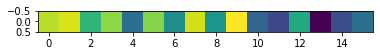

In [73]:
plt.imshow(np.expand_dims(src_lookup['und'], 0))
plt.show()

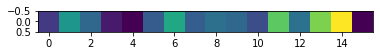

In [74]:
plt.imshow(np.expand_dims(trg_lookup['and'], 0))
plt.show()